# 21M.387 Fundamentals of Music Processing
## Lab4

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
from ipywidgets import interact
import sys
sys.path.append("..")
import fmplib as fmp
from fmplib.pyqueue import connect_to_queue

plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['image.interpolation'] = 'nearest'
fmp.documentation_button()

## Python Review

Useful python tricks below!


### enumerate
Use [`enumerate`](https://docs.python.org/3/library/functions.html#enumerate) to automatically generate an index inside a `for` loop:

In [2]:
numbers = 2 ** np.arange(8)
for (idx, n) in enumerate(numbers):
    print(f'{idx}: {n}')


0: 1
1: 2
2: 4
3: 8
4: 16
5: 32
6: 64
7: 128


### list comprehension

Use [List comprehension](http://www.secnetix.de/olli/Python/list_comprehensions.hawk) to create arrays without a `for` loop using a more compact syntax.

In [3]:
word_list = ['a', 'list', 'of', 'some', 'words']

# create a new list where each item is modified:
new_array = [x + '!' for x in word_list]
print(new_array)

# can be used to filter as well:
new_array = [w for w in word_list if len(w) == 4]
print(new_array)

['a!', 'list!', 'of!', 'some!', 'words!']
['list', 'some']


### np.dot

Use `np.dot` for matrix multiplication and `.T` to transpose a matrix. For example:

In [4]:
a = np.array(((1,2), (3,4), (5,6)))
b = np.array(((1,-1), (1,-1), (1,-1)))
print('A')
print(a, '\n')
print('B')
print(b, '\n')

print('A^T . B')
print(np.dot(a.T, b), '\n')
print('A . B^T')
print(np.dot(a, b.T))

A
[[1 2]
 [3 4]
 [5 6]] 

B
[[ 1 -1]
 [ 1 -1]
 [ 1 -1]] 

A^T . B
[[  9  -9]
 [ 12 -12]] 

A . B^T
[[-1 -1 -1]
 [-1 -1 -1]
 [-1 -1 -1]]


### np.tile

Use [`np.tile`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.tile.html) to created an extended, tiled matrix (either vertically or horizontally or both)


In [5]:
a = np.arange(4).reshape(2,2)
b = np.arange(18).reshape(6,3)
print('A')
print(a, '\n')

a_tiled1 = np.tile(a, (1, 4))
print('A_t1')
print(a_tiled1, '\n')

a_tiled2 = np.tile(a, (3, 1))
print('A_t2')
print(a_tiled2)

A
[[0 1]
 [2 3]] 

A_t1
[[0 1 0 1 0 1 0 1]
 [2 3 2 3 2 3 2 3]] 

A_t2
[[0 1]
 [2 3]
 [0 1]
 [2 3]
 [0 1]
 [2 3]]


### np.argmax and np.argmin

Use [`np.argmax`](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html) to find the _index_ of the maximum value of an array.  
`np.argmin` is the same idea but uses the minimum value.
    

In [6]:
a = 10 * np.random.random( 6 )
print(f'a: {a} \n')

idx = np.argmax(a)
print(f'argmax(a) = {idx}')
print(f'max(a) = {a[idx]}')

a: [2.92533892 3.7385681  4.24975416 2.31939398 0.73820154 1.68417647] 

argmax(a) = 2
max(a) = 4.249754158940804


## Exercise 1

For matrix $\mathbf{A}$ below, find:
- the maximum value along each column, as a vector
- the minimum value along each row, as a vector

(hint: look up `np.min` and `np.max`).

After you have the two vectors:
- Divide $\mathbf{A}$ by the max row vector (column-wise divide)
- Subtract from $\mathbf{A}$ the min column vector (row-wise subtraction)

In [44]:
a = np.roll(np.arange(15).reshape(3,5), 2)
print('A')
print(a)

A
[[13 14  0  1  2]
 [ 3  4  5  6  7]
 [ 8  9 10 11 12]]


In [45]:
a_max = np.max(a, axis=0)
a_min = np.min(a, axis=1)
print(a_min, a_max)
print(a_min.shape)

a = a/a_max - np.tile(a_min, (5, 1)).T
print(a)


[0 3 8] [13 14 10 11 12]
(3,)
[[ 1.          1.          0.          0.09090909  0.16666667]
 [-2.76923077 -2.71428571 -2.5        -2.45454545 -2.41666667]
 [-7.38461538 -7.35714286 -7.         -7.         -7.        ]]


In [ ]:
connect_to_queue()

## Exercise 2

Write `normalize_matrix()` to normalize the _columns_ of a matrix using the $L^2$ norm. Hint: look at [`np.linalg.norm`](https://numpy.org/doc/stable/reference/routines.linalg.html).

Test your function on matrix $\mathbf{A}$ above by showing that the normalized matrix columns are all length 1.


In [46]:
def normalize_matrix(mtx):
    L2 = np.linalg.norm(mtx, axis=0)
    print(L2)
    return mtx/L2

# TODO normalize `a`
a = normalize_matrix(a)
# TODO verify that all columns of `a` are length 1
print(np.linalg.norm(a, axis=0))

[7.9499172  7.90537146 7.43303437 7.41842691 7.40729745]
[1. 1. 1. 1. 1.]


In [ ]:
connect_to_queue()

In [ ]:
connect_to_queue()

## Exercise 3

The next two exercises represent some of the initial steps needed to create a chromagram. We look at finding the FFT bins associated with a set of pitches. 

Write the function `bins_of_pitch()` which takes a single midi-pitch (scalar only) and returns an array of the frequency bins (i.e, values of $k$) that contribute to $\pm 0.5$ semitones around that pitch.

Inputs are: 
- `p`: MIDI pitch
- `fs`: $F_s$, the sampling frequency of the signal
- `fft_len`: $N$, the length of the DFT

Test your function below.

In [120]:
def bins_of_pitch(p, fs, fft_len):
    min_p = p - 0.5
    max_p = p + 0.5
    
    centre_f = fmp.pitch_to_freq(p)
    max_f = fmp.pitch_to_freq(max_p)
    min_f = fmp.pitch_to_freq(min_p)
    
    centre_bin = np.ceil(centre_f*fft_len/fs)
    max_bin = np.floor(max_f*fft_len/fs)
    min_bin = np.ceil(min_f*fft_len/fs)
    
    return [i for i in range(int(min_bin), int(max_bin+1))]

In [122]:
print(bins_of_pitch(69, 22050, 2048))
# should return: [40, 41, 42]

print(bins_of_pitch(78, 22050, 4096))
# should return: [48, 49, 50]


[40, 41, 42]
[134, 135, 136, 137, 138, 139, 140, 141]


In [58]:
connect_to_queue()

Please enter your first and last name, and a kerberos


## Exercise 4

Because the frequency resolution of a DFT can be poor for low notes, it is important to pick an analysis window size that provides enough frequency resolution to create a good chromagram.

For example, see what happens when you look for the frequency bins associated with the note _E2_ (pitch = 40) when $F_s = 22050$, and the DFT size is $N = 2048$

In [62]:
bins = bins_of_pitch(40, 22050, 2048)

print(bins[2]-bins[0])

-1.0


You should see an empty array (no frequency bins for that pitch!).

What value of $N$ (with $N$ being a power of 2) is needed to ensure that all pitches from _C2_ (pitch = 36) on up will have at least two contributing frequency bins?

You can approach this problem experimentally, by trying increasing values of $N$ and testing against a range of pitch values.

In [124]:
for N in [2**i for i in range(20)]:
    for p in range(36, 128):
        bins = bins_of_pitch(p, 22050, N)
        if len(bins) <= 1:
            break
    if p == 127:
        print(N)
    

print(bins_of_pitch(36, 22050, 4096))
print('----------')       
print(bins_of_pitch(36, 22050, 8192))
print(bins_of_pitch(40, 22050, 8192))
print(bins_of_pitch(50, 22050, 8192))
print(bins_of_pitch(65, 22050, 8192))

16384
32768
65536
131072
262144
524288
[12]
----------
[24, 25]
[30, 31]
[53, 54, 55, 56]
[127, 128, 129, 130, 131, 132, 133]


In [108]:
connect_to_queue()

## Exercise 5

The following are two recordings of the beginning of Bach's First Prelude, played at identical tempos. However, they are played in different keys!

Listen to the audio. Can you hear which key each is played in? If not, don't worry. We will use TECHNOLOGY to help us figure it out.

In [68]:
fs = 22050
bach1 = fmp.load_wav('audio/prelude_01.wav')
ipd.Audio(bach1, rate=fs)

In [69]:
bach2 = fmp.load_wav('audio/prelude_02.wav')
ipd.Audio(bach2, rate=fs)

Create chromagrams of each signal with `fmp.make_chromagram()`. See fmplib documentation.
You can use these params:
- window length: $N = 4096$
- hop size: $H = 2048$

Then view and compare these chromagrams (`plt.imshow()` with `origin='lower'` and `aspect='auto'` will work).
Can you tell by visual inspection what key each piece is played in?

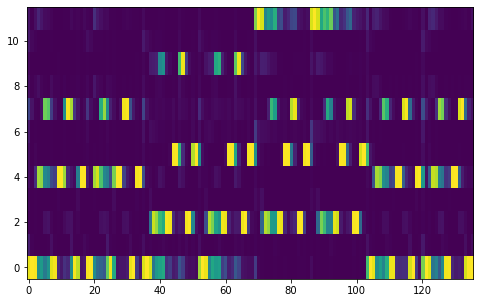

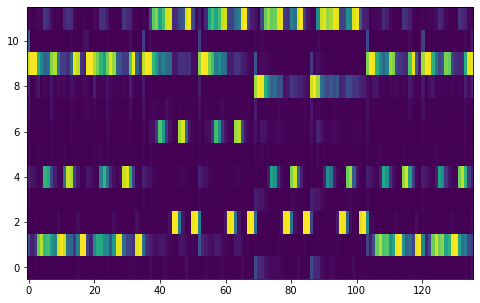

In [73]:
chroma_1 = fmp.make_chromagram(bach1, fs, 4096, 2048)
chroma_2 = fmp.make_chromagram(bach2, fs, 4096, 2048)

plt.imshow(chroma_1, origin='lower', aspect='auto')
plt.show()
plt.imshow(chroma_2, origin='lower', aspect='auto')
plt.show()

#Cmaj, Amaj

f = fmp.pitch_to_freq(48+12)
f2 = fmp.pitch_to_freq(57)

ipd.Audio(fmp.make_sine_tone(1, f, 1, fs), rate=fs)
ipd.Audio(fmp.make_sine_tone(1, f2, 1, fs), rate=fs)

## Exercise 6

We can also answer the question by computational analysis to find the "semitone difference" between these two recordings. If we know that recording 1 is played in C (which it is), we can then calculate the most likely key of recording 2.

The strategy is to compare chromagram 1 with 12 "transposed versions" of chromagram 2. The one that has the highest similarity score represents the most likely semitone difference.

How do we compare chromagrams? In this case, the problem is made easier because both chromagrams have the same number of columns (ie, same length in time). Recall that dot products are useful ways of comparing two vectors to arrive at a similarity score.

[`np.roll`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.roll.html) is a handy function for this purpose.

Write the function `pitch_difference(chroma1, chroma2)` that returns the most likely semitone pitch transposition of chroma2 compared to chroma1.

In [130]:
from numpy import dot
from numpy.linalg import norm

def pitch_difference(chroma1, chroma2):
    max_sim = -100
    for i in range(12):
        chroma2_transpose = np.roll(chroma2, i, 0)
        a = chroma1
        b = chroma2_transpose
        similarity = np.sum(np.multiply(a, b))
        print(similarity, i)
        if max_sim < similarity:
            max_sim = similarity
            best_shift = i
    return best_shift
            
print(pitch_difference(chroma_2, chroma_1))

16.854563830674618 0
22.435848649685617 1
18.353047799185212 2
5.281004061726794 3
21.624906534394185 4
19.302009866037487 5
21.027771842384087 6
10.670382553464982 7
4.0395572070952435 8
131.27337649200535 9
4.9935630312803365 10
9.740600364481454 11
9


In [107]:
a = np.array([0, 1, 0])
b = np.array([1, 0, 1])
similarity = np.sum(dot(a, b.T)/(norm(a)*norm(b)))
print(similarity)

0.0


In [114]:
connect_to_queue('checkoff')